In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [11]:
df.columns=['Sales']

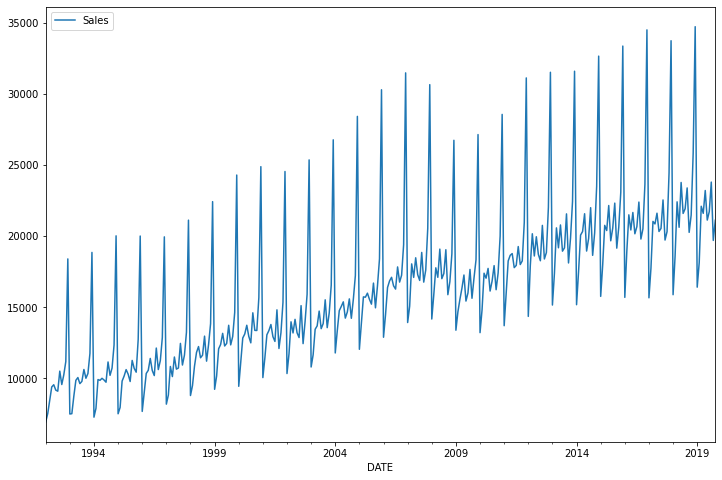

In [12]:
df.plot(figsize=(12,8))

In [13]:
test_size=18
test_index = len(df)-test_size

In [17]:
train=df.iloc[:test_index]
test=df.iloc[test_index:]

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length=12
batch_size=1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=1)

In [22]:
generator[0]

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([[0.02047633]]))

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [26]:
n_features=1
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))

In [27]:
model.compile(optimizer='adam',loss='mse')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [30]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2)

In [31]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [33]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 4s 13ms/step - loss: 0.0250 - val_loss: 0.0057
Epoch 2/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0159 - val_loss: 0.2135
Epoch 3/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0111 - val_loss: 0.0024
Epoch 4/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0043 - val_loss: 0.0128
Epoch 5/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0036 - val_loss: 8.3559e-04
Epoch 6/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0026 - val_loss: 7.9121e-04
Epoch 7/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 1.9184e-04
Epoch 8/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0014 - val_loss: 7.0411e-04
Epoch 9/20
304/304 [==============================] - 2s 8ms/step - loss: 0.0015 - val_loss

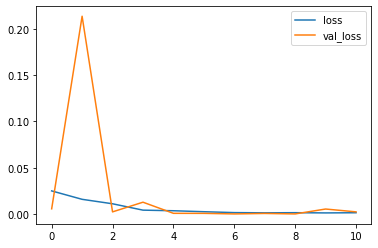

In [34]:
pd.DataFrame(model.history.history).plot()

In [42]:
test_predictions=[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    prediction=model.predict(current_batch)[0]
    test_predictions.append(prediction)
    current_batch = np.append(current_batch[:,1:,:],[[prediction]],axis=1)
    
    

In [49]:
true_prediction = scaler.inverse_transform(test_predictions)

In [51]:
test['predictions']=np.array(true_prediction).reshape(len(test))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
test

,Sales,predictions
DATE,,
2018-05-01,23764,22371.090155
2018-06-01,21589,21114.285945
2018-07-01,21919,21403.012368
2018-08-01,23381,23496.216136
2018-09-01,20260,20649.895520
2018-10-01,21473,21359.412405
2018-11-01,25831,25659.850994
2018-12-01,34706,37112.852377
2019-01-01,16410,16751.108688


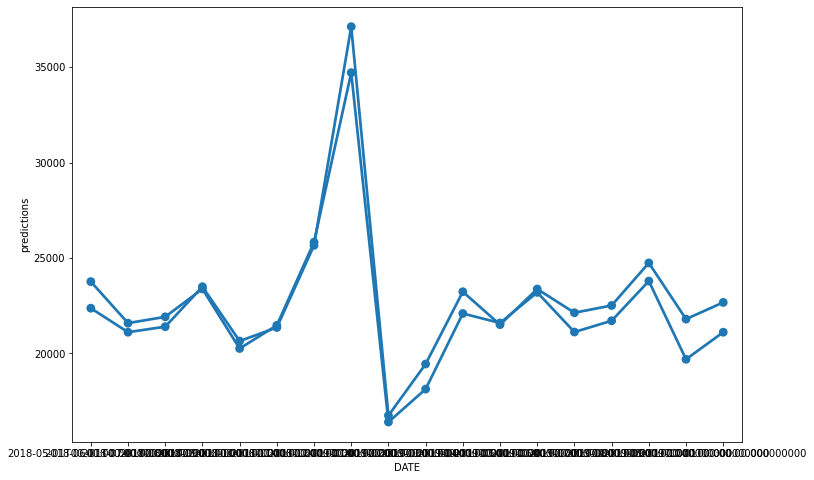

In [53]:
plt.figure(figsize=(12,8))
sns.pointplot(x=test.index,y=test['Sales'])
sns.pointplot(x=test.index,y=test['predictions'])

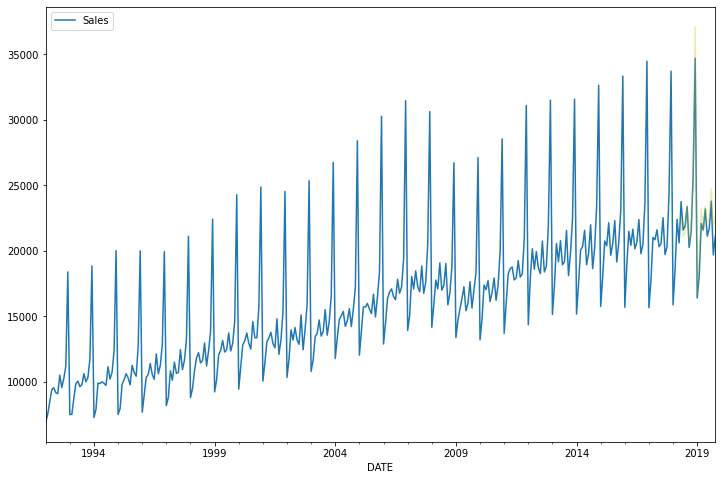

In [57]:
df.plot(figsize=(12,8))
test['predictions'].plot(figsize=(12,8),color='y',alpha=0.3)

In [58]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [75]:
length=12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=length,batch_size=1)
model=Sequential()
model.add(LSTM(150,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(loss='mse')

In [76]:
model.fit_generator(generator,epochs=9)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/9
322/322 [==============================] - 4s 13ms/step - loss: 0.0232
Epoch 2/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0162
Epoch 3/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0099
Epoch 4/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0051
Epoch 5/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0043
Epoch 6/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0032
Epoch 7/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0027
Epoch 8/9
322/322 [==============================] - 3s 9ms/step - loss: 0.0022
Epoch 9/9
322/322 [==============================] - 3s 8ms/step - loss: 0.0022


In [77]:
forecast=[]
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,1))
for i in range(12):
    prediction=model.predict(current_batch)[0]
    forecast.append(prediction)
    current_batch = np.append(current_batch[:,1:,:],[[prediction]],axis=1)
    
    

In [78]:
forecast = scaler.inverse_transform(forecast)

In [79]:
forecast_index= pd.date_range('2019-11-01',periods=12,freq='MS')

In [80]:
 forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [81]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,columns=['forecast'])

In [82]:
forecast_df

,forecast
2019-11-01,21010.716125
2019-12-01,20337.376852
2020-01-01,20318.173298
2020-02-01,21402.219403
2020-03-01,19704.094644
2020-04-01,19981.138371
2020-05-01,23133.102006
2020-06-01,30765.664987
2020-07-01,16440.506763
2020-08-01,18441.821764


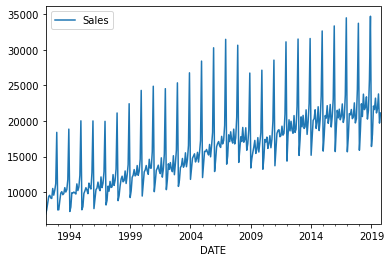

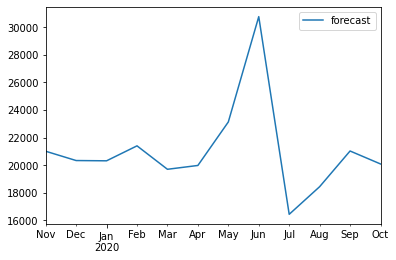

In [83]:
df.plot()
forecast_df.plot()

(576.0, 611.0)

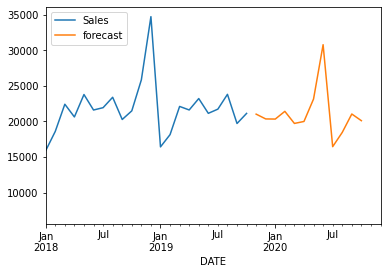

In [84]:
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')